

https://www.kaggle.com/competitions/used-cars-price-prediction-22ds соревнование

https://dzen.ru/a/Y_W7RVk7mG5MUBlh статья по ML

https://github.com/menadzhiev/car_price_predictor/blob/main/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BD%D0%BE%D0%B2%D1%8B%D1%85%20%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb

https://www.dmitrymakarov.ru/

Описание полей данных



1. Date: Год выпуска автомобиля.
2. Make: Марка автомобиля.
3. Model: издание автомобиля определенной марки.
4. Trim: Уровни отделки салона автомобиля — это просто разные версии модели.
5. Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
6. Transmission: механизм, который передает мощность от двигателя к колесам.
7. VIN: идентификационный номер транспортного средства.
8. State: состояние, в котором автомобиль выставлен на аукцион.
9. Condition: Состояние автомобилей на момент аукциона.
10. Odometer: расстояние, пройденное автомобилем с момента выпуска.
11. Color: Цвет кузова автомобиля.
12. Interior: Цвет салона автомобиля.
13. Seller: Продавец автомобиля, автосалоны.
14. mmr: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
15. sellingprice: цена, по которой автомобиль был продан на аукционе.
16. saledate: Дата продажи автомобиля.




План работы
1. Загрузка данных и библиотек для работы
2. Обработка датасетов
3. Изучение данных
4. Постановка задачи для ML
5. Изучение лучших моделей обучения
6. Тестирование всех моделей на тестовой выборке
7. выбор наилучшей модели
8. Вывод


###1. Загрузка данных и библиотек для работы

In [392]:
# Библиотеки используемые в работе
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [393]:
# загрузка датасетов
try:
  train_db = pd.read_csv('train.csv')
  test_db = pd.read_csv('test.csv')
except:
  train_db = pd.read_csv('drive/MyDrive/ЯПрактикум/train.csv')
  test_db = pd.read_csv('drive/MyDrive/ЯПрактикум//test.csv')


In [394]:
# просмотр корректности отображения датасетов
train_db.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [395]:
# # просмотр корректности отображения датасетов
test_db.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


**Вывод:** Были импортированны базовые библиотеки и скачены основные датасеты для работы. Тренировочный и тестовый датасет отображаются без проблем.

###2. Обработка датасетов





In [396]:
def base_analizez(data):
    ''' функция для изучения датасета'''

    print('Просмотр датасета:')
    display(data.head())

    print('\n')
    print('Общая информация об датасете:')
    print(data.info())

    print('\n')
    print('Проверка на наличие значений nan в датасете:')
    display(pd.DataFrame(round(
        data.isna().mean()*100,)).style.background_gradient('coolwarm'))

    # print('\n')
    # print('Изучение корреляции между данными')

    # Т.к. в датасете присутствует большое количество категориальных
    # переменных применим метрику Phik (φk) корреляции.

    # phik_overview = data.phik_matrix()

    # plot_correlation_matrix(phik_overview.values.round(2),
    #                     x_labels=phik_overview.columns,
    #                     y_labels=phik_overview.index,
    #                     vmin=0, vmax=1, color_map="Greens",
    #                     title=r"correlation $\phi_K$",
    #                     fontsize_factor=1,
    #                     figsize=(15, 8))
    # plt.tight_layout()

In [397]:
# подробное изучения тренировойчного датасета
base_analizez(train_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB
None


Проверка на наличие значений nan в дат

,0
year,0.000000
make,2.000000
model,2.000000
trim,2.000000
body,2.000000
transmission,12.000000
vin,0.000000
state,0.000000
condition,2.000000
odometer,0.000000


In [398]:
# изучение тренировочного датасета
base_analizez(test_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None


Проверка на наличие значений nan в датасете:


,0
year,0.000000
make,2.000000
model,2.000000
trim,2.000000
body,2.000000
transmission,12.000000
vin,0.000000
state,0.000000
condition,2.000000
odometer,0.000000


In [399]:
%%time
# Заменим пропуски на самые популярные значения по модели ( в дальнейшем можно применить ML для этого)
def change_transmission(data):
  '''меняет пустые значения на самые распрастраненные'''
  new_transmission = {}
  for i in data['model'].unique():
    counted = []
    try:
      for x in data['transmission'].unique():
        if x == 'Nan':
          pass
        counted.append([x, data.loc[(data['model'] == i) & (data['transmission'] == x), ['transmission']].count()])
    except:
      counted.append('Nan')
    try:
      if counted[0][1] >= counted[1][0]:
        new_transmission[i] = counted[0][0]
      else:
        new_transmission[i] = counted[1][0]
    except:
      new_transmission[i] = counted[0][0]

  for x in data['model'].unique():
    data.loc[(data['model'] == x) & (data['transmission'].isna()), 'transmission'] = new_transmission[x]

  return data

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [400]:
# заполняем пустые данные
train_db = change_transmission(train_db)
test_db = change_transmission(test_db)

In [401]:
# удаляем из тренировочной модели оставшиеся не значительные пустые признаки
train_db = train_db.dropna(subset = ['make', 'model', 'body','trim', 'condition','color', 'odometer'])
# test_db = test_db.dropna(subset = ['make', 'model', 'body','trim', 'condition','color', 'odometer'])


In [402]:
# просмотр резульатов удаления пропусков
base_analizez(train_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 420328 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          420328 non-null  int64  
 1   make          420328 non-null  object 
 2   model         420328 non-null  object 
 3   trim          420328 non-null  object 
 4   body          420328 non-null  object 
 5   transmission  420328 non-null  object 
 6   vin           420328 non-null  object 
 7   state         420328 non-null  object 
 8   condition     420328 non-null  float64
 9   odometer      420328 non-null  float64
 10  color         420328 non-null  object 
 11  interior      420328 non-null  object 
 12  seller        420328 non-null  object 
 13  sellingprice  420328 non-null  int64  
 14  saledate      420328 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 51.3+ MB
None


Проверка на наличие значений nan в дат

,0
year,0.000000
make,0.000000
model,0.000000
trim,0.000000
body,0.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,0.000000
odometer,0.000000


In [403]:
# просмотр резульатов удаления пропусков
base_analizez(test_db)

Просмотр датасета:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)




Общая информация об датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  109702 non-null  object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB
None


Проверка на наличие значений nan в датасете:


,0
year,0.000000
make,2.000000
model,2.000000
trim,2.000000
body,2.000000
transmission,0.000000
vin,0.000000
state,0.000000
condition,2.000000
odometer,0.000000


In [404]:
# выделим колонки с типомаи данных int и object для удобства
def int_or_object(data):
  columns_int = []
  columns_object = []
  for i in data.columns:
    if (data[i].dtype == np.float64 or data[i].dtype == np.int64):
      columns_int.append(i)
    else:
      columns_object.append(i)
  return columns_int, columns_object

In [405]:
columns_int_tr, columns_object_tr = int_or_object(train_db)
columns_int_test, columns_object_test = int_or_object(test_db)

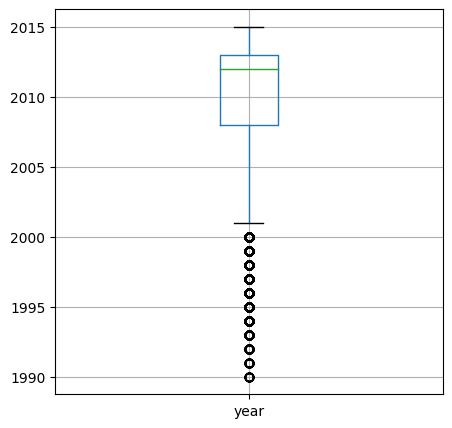

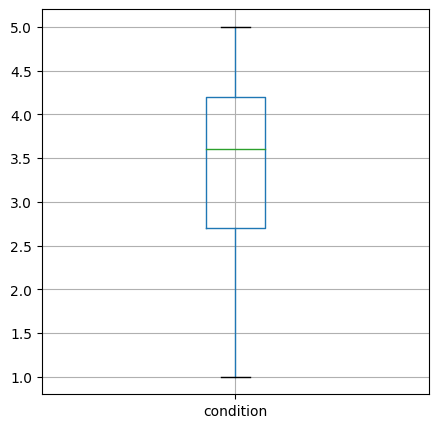

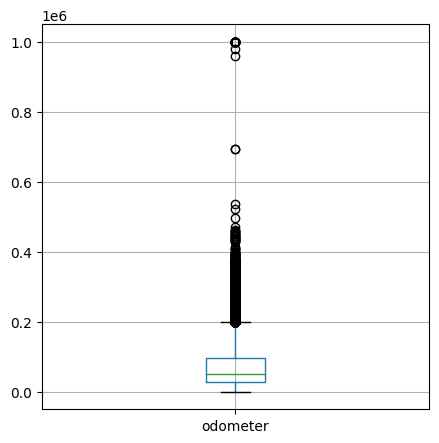

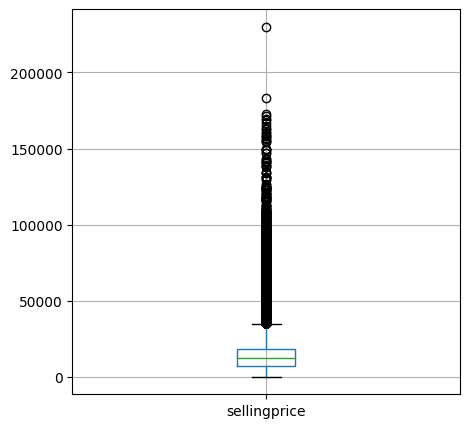

In [406]:
# просмотр распределения значений в тренировочном датасете
for i in columns_int_tr:
  train_db.boxplot(i,figsize=(5, 5))
  plt.show() #для устранения вывода массива с названиями гистрограмм

In [407]:
# вырежем вбрсоовые данные
train_db = train_db.loc[(train_db['year'] >= 2001) & (train_db['sellingprice'] <= 32500) & (train_db['odometer'] <= 180000)]

In [408]:
# просмотр результа изменения датасета
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383188 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          383188 non-null  int64  
 1   make          383188 non-null  object 
 2   model         383188 non-null  object 
 3   trim          383188 non-null  object 
 4   body          383188 non-null  object 
 5   transmission  383188 non-null  object 
 6   vin           383188 non-null  object 
 7   state         383188 non-null  object 
 8   condition     383188 non-null  float64
 9   odometer      383188 non-null  float64
 10  color         383188 non-null  object 
 11  interior      383188 non-null  object 
 12  seller        383188 non-null  object 
 13  sellingprice  383188 non-null  int64  
 14  saledate      383188 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 46.8+ MB


In [409]:
# поиск неявных дубликатов
for x in columns_object_tr:
    print('Уникальные значения для столбца', x, train_db[x].sort_values().unique(), '\n')

Уникальные значения для столбца make ['Acura' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler'
 'Daewoo' 'Dodge' 'FIAT' 'Ford' 'GMC' 'HUMMER' 'Honda' 'Hyundai'
 'Infiniti' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land Rover' 'Lexus' 'Lincoln'
 'MINI' 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan'
 'Oldsmobile' 'Plymouth' 'Pontiac' 'Porsche' 'Ram' 'Saab' 'Saturn' 'Scion'
 'Subaru' 'Suzuki' 'Toyota' 'Volkswagen' 'Volvo' 'smart'] 

Уникальные значения для столбца model ['1 Series' '1500' '2 Series' '200' '2500' '3' '3 Series'
 '3 Series Gran Turismo' '300' '300M' '3500' '350Z' '370Z' '4 Series'
 '4Runner' '5 Series' '5 Series Gran Turismo' '500' '500L' '500e' '6'
 '6 Series' '6 Series Gran Coupe' '626' '7 Series' '9-2X' '9-3' '9-5'
 '9-7X' '911' 'A3' 'A4' 'A5' 'A6' 'A8' 'ATS' 'Acadia' 'Accent' 'Accord'
 'Accord Crosstour' 'Accord Hybrid' 'ActiveHybrid 5' 'ActiveHybrid 7'
 'ActiveHybrid X6' 'Aerio' 'Alero' 'Altima' 'Altima Hybrid' 'Amanti'
 'Armada' 'Ascender' 'As

In [410]:
# изменения неявных дубликатов
train_db['color'] = train_db['color'].str.replace('—', 'Nan')
train_db['interior'] = train_db['interior'].str.replace('—', 'Nan')
train_db['trim'] = train_db['trim'].str.replace('!', 'Nan')
train_db['trim'] = train_db['trim'].str.replace('+', 'Nan')
train_db['model'] = train_db['model'].str.replace('6','6 Series')


In [411]:
# поиск неявных дубликатов
for x in columns_object_test:
    print('Уникальные значения для столбца', x, test_db[x].sort_values().unique(), '\n')

Уникальные значения для столбца make ['Acura' 'Aston Martin' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Daewoo' 'Dodge' 'FIAT' 'Ferrari' 'Fisker' 'Ford'
 'GMC' 'Geo' 'HUMMER' 'Honda' 'Hyundai' 'Infiniti' 'Isuzu' 'Jaguar' 'Jeep'
 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'Lotus' 'MINI' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mercury' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Ram' 'Rolls-Royce' 'Saab' 'Saturn' 'Scion' 'Subaru'
 'Suzuki' 'Tesla' 'Toyota' 'Volkswagen' 'Volvo' 'acura' 'audi' 'bmw'
 'buick' 'cadillac' 'chev truck' 'chevrolet' 'chrysler' 'dodge' 'ford'
 'ford tk' 'gmc' 'honda' 'hyundai' 'hyundai tk' 'jeep' 'kia' 'land rover'
 'landrover' 'lexus' 'lincoln' 'mazda' 'mercedes' 'mercury' 'mitsubishi'
 'nissan' 'oldsmobile' 'pontiac' 'porsche' 'smart' 'subaru' 'toyota'
 'volkswagen' 'vw' nan] 

Уникальные значения для столбца model ['1' '1 Series' '1500' '2 Series' '200' '200SX' '2500' '3' '3 Series'
 '3 Series Gran Turismo' '300' '300-Cla

In [412]:
# изменения неявных дубликатов

test_db['interior'] = test_db['interior'].str.replace('—', 'Nan')

test_db['trim'] = test_db['trim'].str.replace('!', 'Nan')


test_db['model'] = test_db['model'].str.replace('1','1 Series')
test_db['model'] = test_db['model'].str.replace('3','3 Series')
test_db['model'] = test_db['model'].str.replace('300','300-Class')

In [413]:
# исследования наличия дубликатов в датасете
train_db.duplicated().sum()

0

In [414]:
def overwriting_saledate(data):
    data['date'] = pd.to_datetime(data['saledate'], infer_datetime_format=True, utc=True)
    data['date'] = data['date'].dt.date



In [415]:
train_db['saledate'] = overwriting_saledate(train_db)
test_db['saledate'] = overwriting_saledate(test_db)

In [416]:
train_db = train_db.drop(columns=['saledate'], axis=1)
train_db = train_db.rename(columns={"date": "saledate"})

test_db = test_db.drop(columns=['saledate'], axis=1)
test_db = test_db.rename(columns={"date": "saledate"})

In [417]:
train_db['saledate'] = pd.to_datetime(train_db['saledate'], format = '%Y-%m-%d')
test_db['saledate'] = pd.to_datetime(test_db['saledate'], format = '%Y-%m-%d')

In [418]:
train_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02


In [419]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383188 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          383188 non-null  int64         
 1   make          383188 non-null  object        
 2   model         383188 non-null  object        
 3   trim          383188 non-null  object        
 4   body          383188 non-null  object        
 5   transmission  383188 non-null  object        
 6   vin           383188 non-null  object        
 7   state         383188 non-null  object        
 8   condition     383188 non-null  float64       
 9   odometer      383188 non-null  float64       
 10  color         383188 non-null  object        
 11  interior      383188 non-null  object        
 12  seller        383188 non-null  object        
 13  sellingprice  383188 non-null  int64         
 14  saledate      383188 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [420]:
test_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-13
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015-02-26
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-23
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-05
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015-06-02


In [421]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          110058 non-null  int64         
 1   make          107997 non-null  object        
 2   model         107979 non-null  object        
 3   trim          107944 non-null  object        
 4   body          107464 non-null  object        
 5   transmission  109702 non-null  object        
 6   vin           110058 non-null  object        
 7   state         110058 non-null  object        
 8   condition     107679 non-null  float64       
 9   odometer      110039 non-null  float64       
 10  color         109900 non-null  object        
 11  interior      109900 non-null  object        
 12  seller        110058 non-null  object        
 13  saledate      110058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage:

**Вывод:**

###3. Изучение данных

In [422]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383188 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          383188 non-null  int64         
 1   make          383188 non-null  object        
 2   model         383188 non-null  object        
 3   trim          383188 non-null  object        
 4   body          383188 non-null  object        
 5   transmission  383188 non-null  object        
 6   vin           383188 non-null  object        
 7   state         383188 non-null  object        
 8   condition     383188 non-null  float64       
 9   odometer      383188 non-null  float64       
 10  color         383188 non-null  object        
 11  interior      383188 non-null  object        
 12  seller        383188 non-null  object        
 13  sellingprice  383188 non-null  int64         
 14  saledate      383188 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [423]:
train_gr = train_db.groupby('year').agg({'condition': 'median', 'odometer':'median', 'sellingprice':'median'})
test_gr = test_db.groupby('year').agg({'condition': 'median', 'odometer':'median'})

In [424]:
display(train_gr)
display(test_gr)

,condition,odometer,sellingprice
year,,,
2001,2.1,132723.0,1800.0
2002,2.3,132406.0,2200.0
2003,2.5,127947.0,2900.0
2004,2.5,124636.0,3750.0
2005,2.6,118398.5,4200.0
2006,2.7,112349.0,5300.0
2007,2.8,105654.0,6900.0
2008,3.0,96202.5,8300.0
2009,3.2,87866.0,9000.0


,condition,odometer
year,,
1982,4.0,18404.0
1984,1.0,170799.0
1986,1.0,107094.0
1987,1.5,151242.0
1989,2.0,132551.0
1990,2.0,135657.0
1991,2.0,175381.0
1992,2.0,160154.5
1993,2.0,168792.0


<Axes: title={'center': 'Кол-во фильмов вышедних за каждый год'}, xlabel='year'>

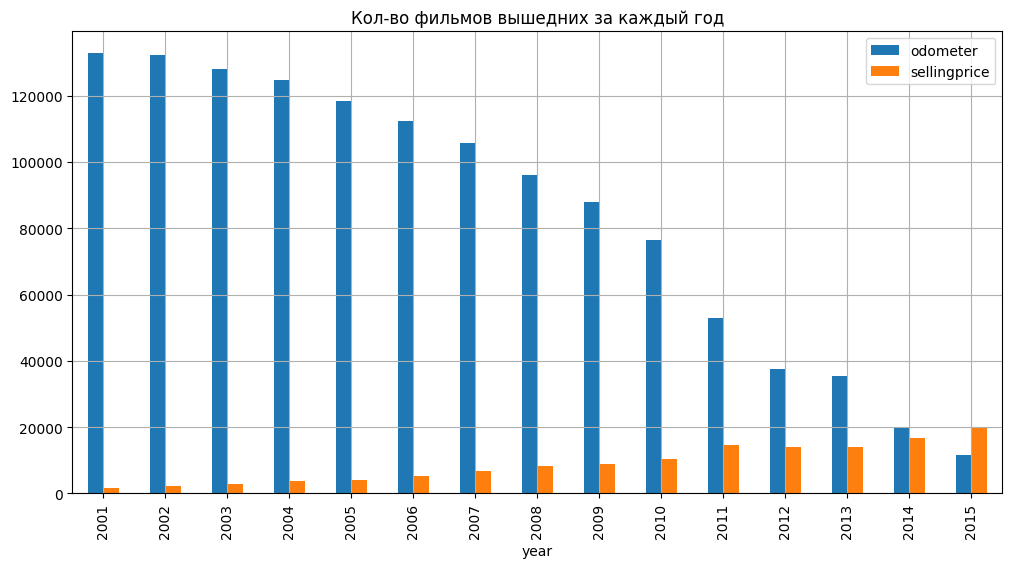

In [425]:
train_gr.plot(kind = 'bar',y = ['odometer', 'sellingprice'],
                    title = 'Кол-во фильмов вышедних за каждый год', grid = True,
                    figsize = (12,6))

<Axes: title={'center': 'Кол-во фильмов вышедних за каждый год'}, xlabel='year'>

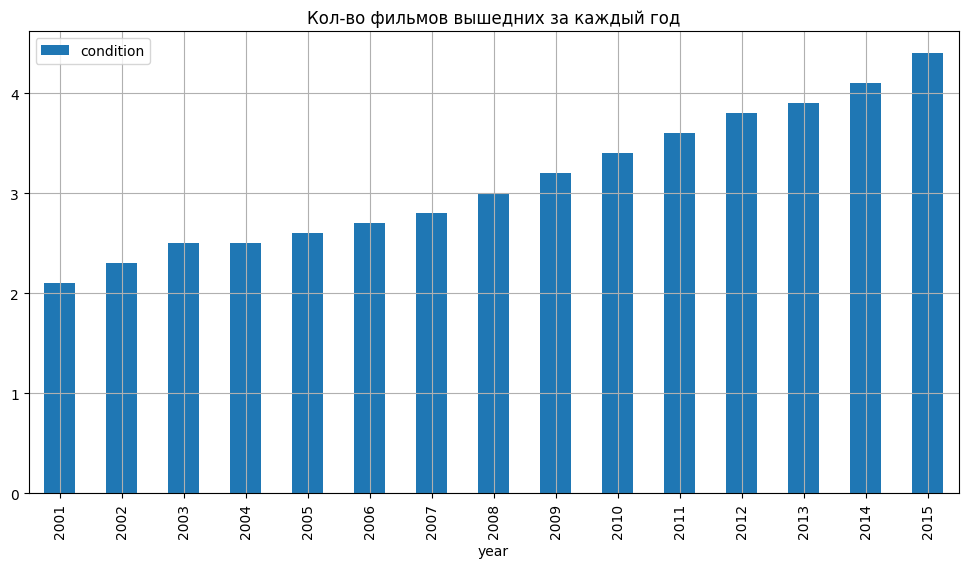

In [426]:
train_gr.plot(kind = 'bar',y = 'condition',
                    title = 'Кол-во фильмов вышедних за каждый год', grid = True,
                    figsize = (12,6))

<Axes: title={'center': 'Кол-во фильмов вышедних за каждый год'}, xlabel='year'>

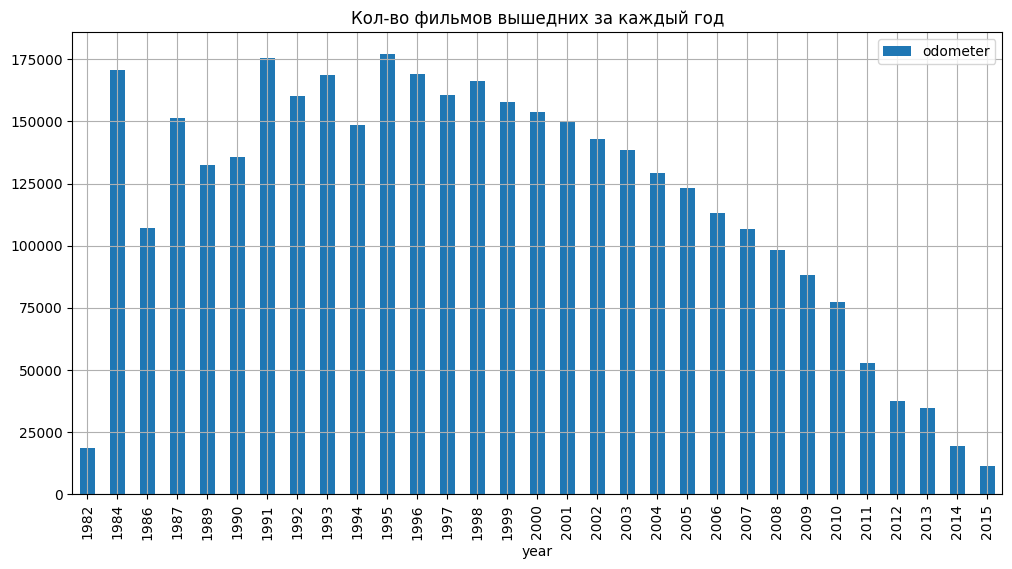

In [427]:
test_gr.plot(kind = 'bar',y = ['odometer'],
                    title = 'Кол-во фильмов вышедних за каждый год', grid = True,
                    figsize = (12,6))

<Axes: title={'center': 'Кол-во фильмов вышедних за каждый год'}, xlabel='year'>

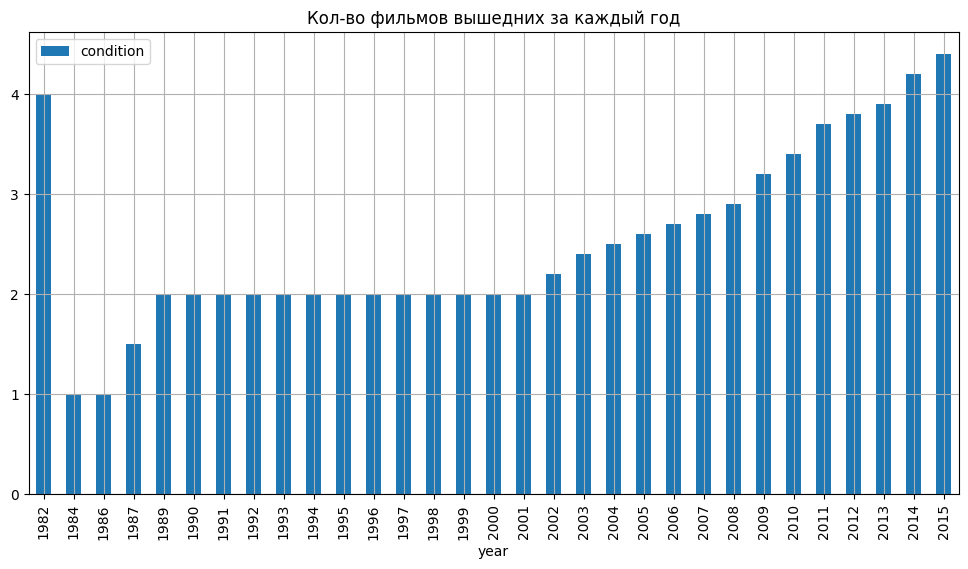

In [428]:
test_gr.plot(kind = 'bar',y = 'condition',
                    title = 'Кол-во фильмов вышедних за каждый год', grid = True,
                    figsize = (12,6))

In [431]:
train_db.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,age_car
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01,4
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24,1
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09,3
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16,12
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02,8


In [430]:
train_db['age_car'] = train_db['saledate'].dt.year - train_db['year']
test_db['age_car'] = test_db['saledate'].dt.year - test_db['year']

array(['NaT'], dtype='datetime64[ns]')